

# Project: No show appointment dataset investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this analysis I will be analysing the no show appointment dataset, that contains infomation about patients medical history in Brazil. In addition I will explore the data to find out variables that may be influencing a patients decision wether to show up for their hospital appointment or not to show up.

> I will be analysing how demographic variables like Age and Gender influence appointment show. I will also analyze how patients medical conditions affect appointment show.

 Research Questions:
1. What Gender is more likely to show up for scheduled appointment?

2. Are patients more likely to show up for appointment on a particular month?

3. Is a patient more likely to show up for their appointment if they receive a reminder about their appointment? 
4. Is a patients medical condition likely to influence if they will be on scholarship and show up for their appointment?


In [54]:
# importing libraries needed for analysis     
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section I will be loading in the data, inspect the dataset to identify any inconsistencies that might reqiure cleaning.

### General Properties

In [2]:
# Loading in the data
appointment_df = pd.read_csv("noshow_appointments.csv",parse_dates=["ScheduledDay","AppointmentDay"])
#print first 5 rows to overview the data
appointment_df.head() 


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>The parameter parse_dates was added while loading in the dataset so pandas can identify the two columns indicated as datetime. I followed pandas documentation as a guide [link text](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html#min-tut-09-timeseries)

In [3]:
# check the dimension of the data
appointment_df.shape

(110527, 14)

The dataset contains 110527 rows and 14 columns.

In [4]:
# check general information about the data
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

This is showing the datatype of each column and its also showing that none of the rows have missing values.

In [5]:
# check for missing values
appointment_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in this data

In [6]:
# check for statistical summary of some nummerical columns
appointment_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# check for duplicate enteries
appointment_df.duplicated().sum()

0

>There is no duplicated entry in this data.

>
**Data Cleaning:** As part of data cleaning process I will be droping some columns that I dont need for my analysis, change the column names to lower case, correct misspelt column names and extract weekdays and month from datetime column. I will also rename 'no-show' column and change the column values. 

In [8]:
# Drop columns not needed for analysis
appointment_df.drop(['PatientId','AppointmentID','ScheduledDay'], axis=1,inplace=True)


In [9]:
# correct misspelt column names
appointment_df.rename(columns={'Hipertension': 'Hypertension','Handcap': 'Handicap'},inplace=True)
# check for changes
appointment_df.head(2)

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [10]:
# changing the column names to lower case
appointment_df.columns = appointment_df.columns.str.lower()

>I followed this link [link text](https://stackoverflow.com/questions/19726029/how-can-i-make-pandas-dataframe-column-headers-all-lowercase) as a guide to change the column headers from upper case to lower for easy accessibility.

In [11]:
# check for changes
appointment_df.head(1)

,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
# create a new column that shows month of appointmentday
appointment_df['month'] = appointment_df['appointmentday'].dt.month


In [13]:
# create a new column that shows day of the week for the appointment
appointment_df['weekday'] = appointment_df['appointmentday'].dt.weekday


>I extracted month and weekday from appointmentday column.This will make it easy to analyse relationship between month or weekday of appointment and patients showup. I followed this pandas documentation as a guide in extracting month and weekday [link text](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html#min-tut-09-timeseries) 

In [14]:
# check newly added columns
appointment_df.head(1)

,gender,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,month,weekday
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4


In [15]:
# drop appointmentday column
appointment_df.drop('appointmentday',axis=1,inplace=True)

>I dropped appointmentday column because it wont be needed for analysis since I have new columns showing month and weekday.

In [16]:
appointment_df.head(2)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show,month,weekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4


In [17]:
# Rename no-show column
appointment_df.rename(columns={'no-show':'show'},inplace=True)
# change the values in show column from No and Yes to Yes and No 
appointment_df.show.replace(('No','Yes'),(1,0),inplace=True)


> I changed the the name of the column that shows if a patient made it to their scheduled appointment or not.The column is originally named "no-show", which for me is a bit confusing, I changed it to "show".

> I went further to change the values in the show column "No" and "Yes", No meaning that the patient showed up and Yes meaning that the patient didn't show up, I replaced No with 1 and Yes with 0. This was done to make it easy for data exploration and to avoid any confusion that might occur. I used this link [link text](https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-t) as a guide for changing values in a column.

<a id='eda'></a>
## Exploratory Data Analysis


> In this section I will explore the data to see the number of patients that showed up and those that didnot show up for their appointment. 
> I will further explore factors that may likely determine if a patient will show up for their appopintment or not.

In [18]:
# Get a dataframe of patients that showed up
showed_df = appointment_df[appointment_df['show'] ==1]
showed_df = appointment_df.query('show ==1')

showed_df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,month,weekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,4
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,4


In [19]:
# check for number of patients that showed up
showed_df.shape[0]

88208

>Out of 110527 patients , 88208 showed up for their scheduled appointment.

In [20]:
# get a dataframe of patients that did not show up
didnot_show = appointment_df[appointment_df['show'] ==0]
didnot_show = appointment_df.query('show ==0')

didnot_show.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show,month,weekday
6,F,23,GOIABEIRAS,0,0,0,0,0,0,0,4,4
7,F,39,GOIABEIRAS,0,0,0,0,0,0,0,4,4
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,0,4,4
17,F,40,CONQUISTA,1,0,0,0,0,0,0,4,4
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,0,4,4


In [21]:
# check for number of patients that did not show up
didnot_show.shape[0]

22319

> Out of 110527, 22319 patients didnot show up for their appointment.

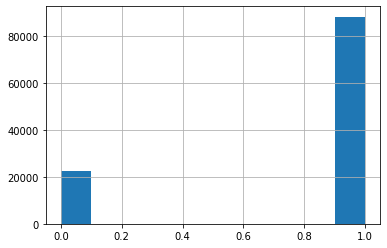

In [22]:
# visualize the distribution of how patients showed up for appoiintment
appointment_df.show.hist();

**Research Question 1:** What Gender is more likely to show up for scheduled appointment?

In [23]:
# check for number of male and female 
appointment_df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

> According to this data there are more female than male patients.

In [24]:
# check for gender that showed up the most
showed_df.gender.value_counts()

F    57246
M    30962
Name: gender, dtype: int64

In [25]:
# check for gender that did not show up the most
didnot_show.gender.value_counts()

F    14594
M     7725
Name: gender, dtype: int64

In [26]:
#number of patients that showed and did not show for each gender category
appointment_df.groupby('gender')['show'].value_counts()


gender  show
F       1       57246
        0       14594
M       1       30962
        0        7725
Name: show, dtype: int64

In [27]:
#create a mask for patients that showed and patients that did not show
in_attendance = appointment_df.show == True
not_in_attendance = appointment_df.show == False

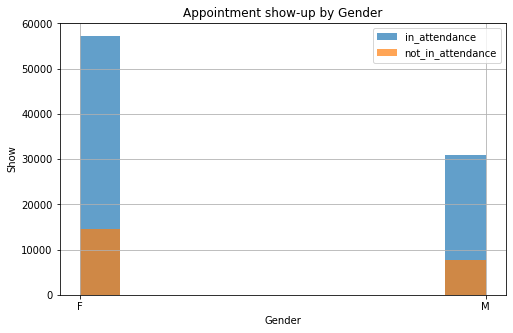

In [28]:
# plot histogram to visualize how each gender showed up for appointment
appointment_df.gender[in_attendance].hist(alpha=0.7, label='in_attendance',figsize=(8,5))
appointment_df.gender[not_in_attendance].hist(alpha=0.7, label='not_in_attendance',figsize=(8,5))
plt.xlabel('Gender')
plt.ylabel('Show')
plt.title('Appointment show-up by Gender')
plt.legend();

> Generally according to the data there are more female patients compared to male patients.

> Exploratory analysis shows that on the average females are the gender that showed up the most and also the gender that did not show up the most.

**Research Question 2:** Are patients more likely to show up for appointment on a particular month?

In [29]:
# check for months for appointment
appointment_df.month.unique()

array([4, 5, 6])

> Patients appointment schedule are for a period of 3 months.

In [30]:
# check average of patients that show up per month
average_month = appointment_df.groupby('month')['show'].mean()

In [31]:
# define a function that plots bar chart
def chart(dataframe,x_label,y_label,title,):
    dataframe.plot.bar(color=['blue','midnightblue'],figsize=(8,5))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()
    

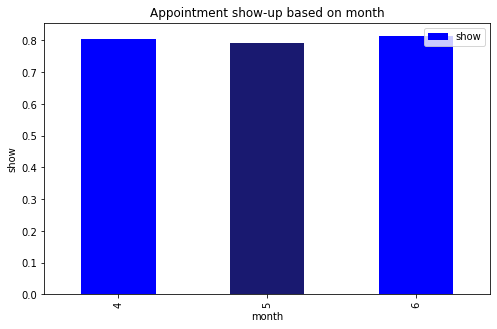

In [32]:
# call chart function to visualize month that patients showed up the most
chart(average_month,'month','show','Appointment show-up based on month')

> This shows that on the average there's no much difference on appointment show up based on month. Also showing that on the average patients show up is slightly higher in the 6th month than other months. 


**Research Question 3:** Is a patient more likely to show up for their appointment if they receive a reminder about their appointment?

In [33]:
# check for patients that received reminder and those that did not receive reminder and how they showed up
received_sms = appointment_df.groupby('sms_received'	)['show'].value_counts()
received_sms

sms_received  show
0             1       62510
              0       12535
1             1       25698
              0        9784
Name: show, dtype: int64

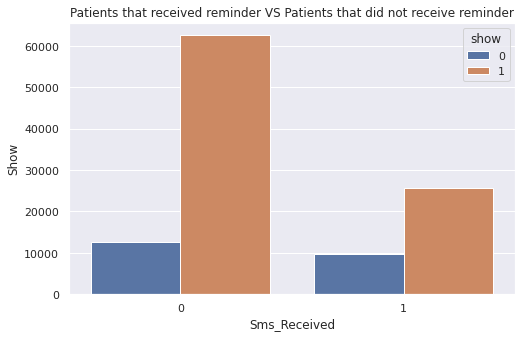

In [34]:
# use count plot to visualize how patients that received reminder and patients that did not receive reminder showed up
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='sms_received', hue='show',data=appointment_df)
plt.xlabel('Sms_Received')
plt.ylabel('Show')
plt.title('Patients that received reminder VS Patients that did not receive reminder')
plt.show()

> A good number of patients did not receive sms reminder about their appointment. This visual shows that inspite of not receiving a reminder they still showed up for their appointment.
> A good number of patients that received sms reminder did not show up for their appointment.

**Research Question 4:** Is a patients medical condition likely to influence if they will be on scholarship and show up for their appointment?

In [36]:
# define a function that plots bar chart for 2 dependent variables
def bar2(dataframe,x_label,y_label, hue,title):
    sns.catplot(x=x_label, y=y_label, hue=hue, kind="bar", height=5.0,data=dataframe)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

In [51]:
#check for number of patients that are alcoholics and not alcoholics, if they are on schorlarship and appointment show 
appointment_df.groupby(['alcoholism','show'])['scholarship'].value_counts()

alcoholism  show  scholarship
0           0     0              19213
                  1               2429
            1     0              77621
                  1               7904
1           0     0                528
                  1                149
            1     0               2304
                  1                379
Name: scholarship, dtype: int64

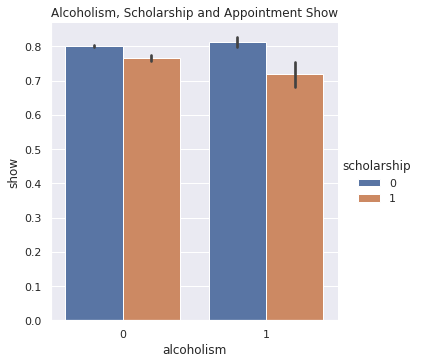

In [52]:
# visualize patients that patients that are alcoholic,not alcoholic if they are on scholarship and thei appointment show
bar2(appointment_df,'alcoholism','show','scholarship','Alcoholism, Scholarship and Appointment Show')

> This visualization shows that non-alcoholic patients are higher recipients of the health scholarship, it further shows  that both alcoholic and non- alcoholic patients that are not on scholarship show up more for their medical appointment.

In [40]:
#check for number of patients that are hyprtensive and not hypertensive, if they are on schorlarship and appointment show 
appointment_df.groupby(['hypertension','show'])['scholarship'].value_counts()


hypertension  show  scholarship
0             0     0              16341
                    1               2206
              1     0              63408
                    1               6771
1             0     0               3400
                    1                372
              1     0              16517
                    1               1512
Name: scholarship, dtype: int64

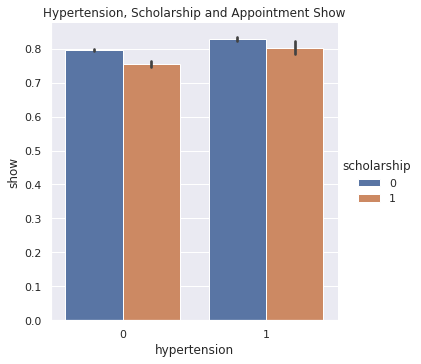

In [45]:
# visualize patients that received reminder based on gender and how they showed up
bar2(appointment_df,'hypertension','show','scholarship','Hypertension, Scholarship and Appointment Show')

> Visualization shows that patients who are hypertensive are on scholarship more than those who are not hypertensive and generally patients who are hypertensive and not on scholarship showed up more.

In [43]:
#check for number of patients that are diabetic and not diabetic, if they are on schorlarship and appointment show 
appointment_df.groupby(['diabetes','show'])['scholarship'].value_counts()

diabetes  show  scholarship
0         0     0              18434
                1               2455
          1     0              73858
                1               7837
1         0     0               1307
                1                123
          1     0               6067
                1                446
Name: scholarship, dtype: int64

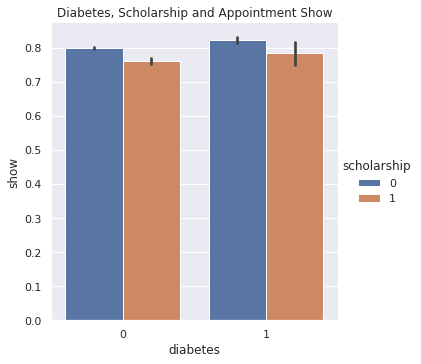

In [46]:
# visualize patients that received reminder based on gender and how they showed up
bar2(appointment_df,'diabetes','show','scholarship','Diabetes, Scholarship and Appointment Show')

> This shows that patients who are diabetic are on scholarship more than those who are not diabetic and generally patients who are diabetic and not on scholarship showed up more for scheduled appointment.

<a id='conclusions'></a>
**Conclusions**
> 1.The data contains information about 110527 patients, Out of 110527 patients, 71840 are females while 38687 males. 

2. From the analysis done, 88208 patients showed up for their appointment while 22319 patients did not show up.
Out of 88208 patients that showed up, 57246 are females while 30962 are males. Out of 22319 that did not show up, 14594 are females while 7725 are males.

3.	The unique months in the dataset are 4,5,6. On the average patients are more likely to show up on the 6th month.
4.	Out of 110527 patients, 75045 did not receive a reminder about their appointment while 35482 received a reminder. Out of 75045 patients that did not receive sms reminder 62510 showed up for their appointment and 12535 did not show up , while out of 35482 that received a reminder 25698 showed up and 9784 did not show up for their appointment.
5. Out of the 3 medical conditions (alcoholism, hypertension, diabetes) that were explored, there is a similar pattern for patients who are hypertensive and diabetic, where patients that are hypertensive and diabetic are on scholarship more than patients that are not hypertensive and not diabetic, the pattern is quite different for alcoholism, with patients who are not alcoholics being on scholarship more than patients who are alcoholics.
The pattern that is similiar in all 3 medical conditions is that for each medical condition patients who are not on scholarship show up more for their appointment.




**Limitations:** The values in handicap column is quite confusing, it has values 0,1,2,3,4. But in the dataset description on kaggle the values are True and False.


